### Import the needed libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# READ THE DATA

In [5]:
data=pd.read_csv("Salary_Data.csv")

In [6]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Data processing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [14]:
data[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [64]:
#IMPLEMENTATION

In [16]:
X = data[['YearsExperience']]  
y = data['Salary']  

In [88]:
# just for clarify

In [86]:
z=data['YearsExperience']
print(z.shape)

(30,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Fit the model

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
print(X_train.shape)

(24, 1)


In [22]:
y_pred = model.predict(X_test)

In [48]:
X_test.shape

(6, 1)

In [50]:
model.intercept_

25321.583011776813

In [53]:
model.coef_

array([9423.81532303])

In [55]:
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [57]:
y_test

27    112635
15     67938
23    113812
17     83088
8      64445
9      57189
Name: Salary, dtype: int64

## Accuracy

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 49830096.85590839
R2 Score: 0.9024461774180497


### visuvalization 

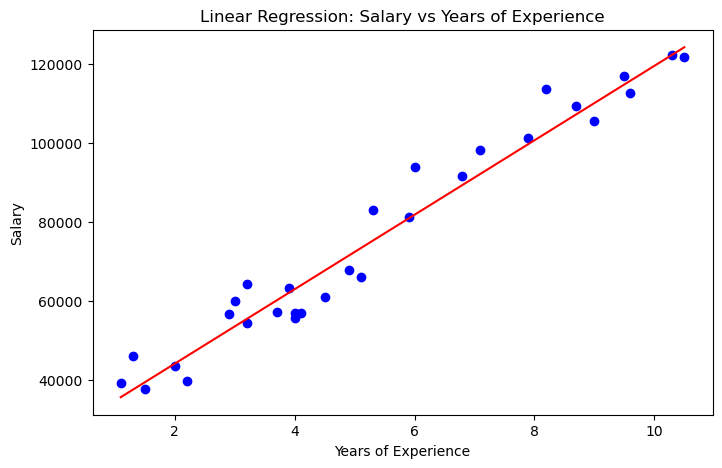

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

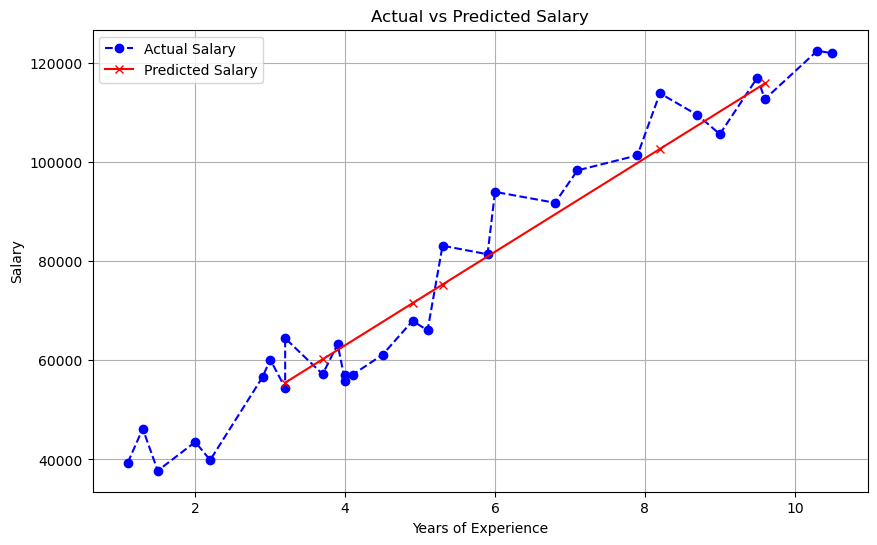

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(data['YearsExperience'], data['Salary'], label='Actual Salary', color='blue', marker='o', linestyle='--')
plt.plot(X_test.sort_values(by='YearsExperience'), y_pred[np.argsort(X_test.index)], 
         label='Predicted Salary', color='red', marker='x', linestyle='-')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
data['Predicted Salary'] = model.predict(data[['YearsExperience']])
data['Residuals'] = data['Salary'] - data['Predicted Salary']

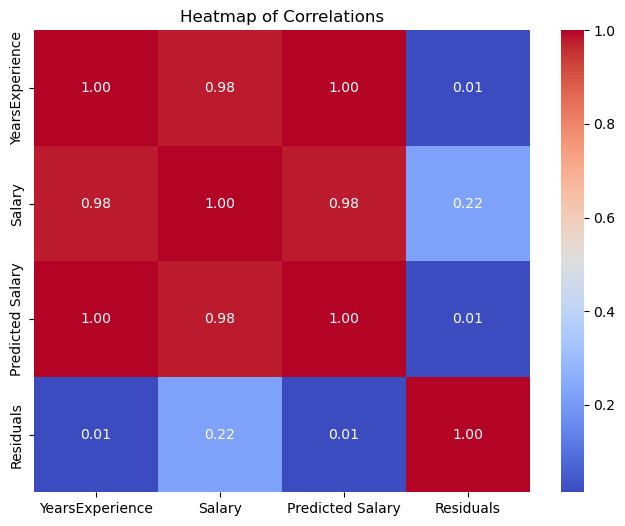

In [84]:
plt.figure(figsize=(8, 6))
correlation_matrix = data[['YearsExperience', 'Salary', 'Predicted Salary', 'Residuals']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

In [1]:
with open("salary_prediction_app.py", "w") as f:
    f.write("""
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

@st.cache
def load_data():
    file_path = 'Salary_Data.csv'
    data = pd.read_csv(file_path)
    return data

data = load_data()

X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mean_train = np.mean(y_train)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mean_test = np.mean(y_test)

st.title("Salary Prediction App")

experience = st.number_input("Enter Years of Experience:", min_value=0.0, step=0.1)
if experience:
    salary_pred = model.predict([[experience]])
    st.write(f"Predicted Salary for {experience} years of experience: ₹{salary_pred[0]:,.2f}")

if st.button("Mean"):
    st.write(f"Mean Salary (Training): ₹{mean_train:,.2f}")
    st.write(f"Mean Salary (Testing): ₹{mean_test:,.2f}")

if st.button("MSE"):
    st.write(f"MSE (Training): {mse_train:,.2f}")
    st.write(f"MSE (Testing): {mse_test:,.2f}")

if st.button("RMSE"):
    st.write(f"RMSE (Training): {rmse_train:,.2f}")
    st.write(f"RMSE (Testing): {rmse_test:,.2f}")

if st.button("R²"):
    st.write(f"R² (Training): {r2_train:.2%}")
    st.write(f"R² (Testing): {r2_test:.2%}")

if st.button("Visualizations"):
    st.write("### Actual vs Predicted Salaries")
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    axs[0].scatter(X_train, y_train, color='blue', label='Actual')
    axs[0].plot(X_train, y_train_pred, color='red', label='Predicted')
    axs[0].set_title("Training Data")
    axs[0].set_xlabel("Years of Experience")
    axs[0].set_ylabel("Salary")
    axs[0].legend()

    axs[1].scatter(X_test, y_test, color='green', label='Actual')
    axs[1].plot(X_test, y_test_pred, color='orange', label='Predicted')
    axs[1].set_title("Test Data")
    axs[1].set_xlabel("Years of Experience")
    axs[1].set_ylabel("Salary")
    axs[1].legend()

    st.pyplot(fig)

    st.write("### Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
    st.pyplot(fig)
    """)


UnicodeEncodeError: 'charmap' codec can't encode character '\u20b9' in position 1286: character maps to <undefined>